Graph formed successfully
Largest connected graph formed successfully
Got degree distribution
Found acc
Maximum cc = 1.0
Minimum cc = 0


KeyboardInterrupt: 

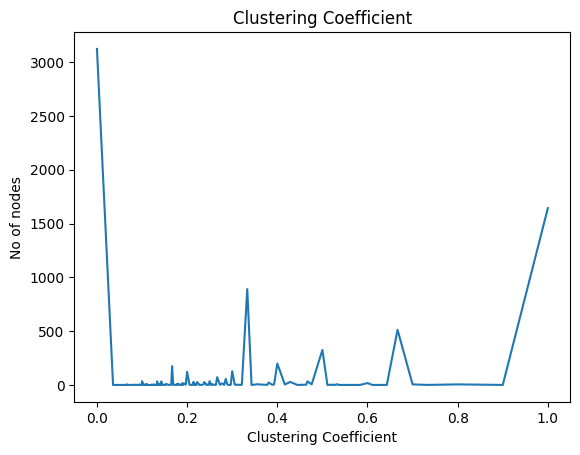

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Read the dataset using pandas
d1 = pd.read_csv('../Train_details_22122017.csv')

G = nx.Graph()
#Function to find the degree distribution from a list of degrees
#Returns a dictionary having the keys as degree and value as its number of occurences
def get_ddist(g):
    l = len(g)
    d = dict()
    for i in range(0,l):
        if g[i] in d.keys():
            d[g[i]] = d[g[i]] + 1
        else:
            d[g[i]] = 1
    return d

#Create the graph from dataset
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1])
            
print("Graph formed successfully")
    
#getting a list of all the connected components in G
h = list(nx.connected_components(G))

#Selecting the largest connected component
G1 = nx.subgraph(G,h[0])
print("Largest connected graph formed successfully")

#Getting the degree distribution of G1
dict1 = dict(G1.degree())
dd = get_ddist(list(dict1.values()))
print("Got degree distribution")

#Sorting dd according to degree
degree_distribution_sorted = dict(sorted(dd.items()))

#FInding the APL of G1
#apl = nx.average_shortest_path_length(G1)

#Finding the average clustering co-efficient
acc = nx.clustering(G1)
print("Found acc")

#To plot the degree distribution
# plt.plot(dds.keys(),dds.values())
# plt.title('Degree distribution')
# plt.xlabel('Degree')
# plt.ylabel('No of nodes')

#To plot the variation of clustering co-efficient
acc_dict = dict(acc)
acc_dds = get_ddist(list(acc_dict.values()))
acc_distribution_sorted = dict(sorted(acc_dds.items()))
plt.plot(acc_distribution_sorted.keys(),acc_distribution_sorted.values())
plt.title('Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('No of nodes')
print("Maximum cc = " + str(max(acc_dict.values())))
print("Minimum cc = " + str(min(acc_dict.values())))

#To find the number of bridge links
bridge_links = list(nx.bridges(G1))

#To find the number of articulation points
ap = list(nx.articulation_points(G1))

#To find the most important articulation point
count = 0
c7 = 0
nap = np.empty((len(ap),3),dtype='S5')
for a in ap:
    G2 = nx.Graph(G1)
    G2.remove_node(a)
    h1 = list(nx.connected_components(G2))
    G21 = nx.subgraph(G2,h1[0])
    G22 = nx.subgraph(G2,h1[1])
    n1 = len(list(G21.nodes))
    n2 = len(list(G22.nodes))
    nap[count,0] = a
    nap[count,1] = str(n1)
    nap[count,2] = str(n2)
    count = count + 1
    
    if abs(n1 - n2) < 7000:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2)) 
        c7 = c7 + 1
    if abs(n1 - n2) < 7500 and count > 100 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
    if abs(n1 - n2) < 8000 and count > 200 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
lnap = nap[:,2]
knap = np.empty(len(lnap))
ic = 0
for i in lnap:
    knap[ic] = int(i)
    ic = ic + 1
apdict = dict()
ni = 0
for ni in range(len(nap)):
    k = int(nap[ni,2])
    if k in apdict.keys():
        apdict[k] = apdict[k] + 1
    else:
        apdict[k] = 1
dap = dict(sorted(apdict.items()))
plt.plot(dap.keys(),dap.values())
plt.title('Articulation points')
plt.xlabel('No of nodes in smaller graph')
plt.ylabel('No of Articulation points')

#Getting sorted order of important articulation points
ap_sm = dict()
for i in range(len(nap)):
    ap_sm[int(nap[i,2])] = (nap[i,0].decode('utf-8'))

ap_sms = dict(sorted(ap_sm.items()))

Graph formed successfully
Largest connected graph formed successfully
Got degree distribution
Found acc
Maximum cc = 1.0
Minimum cc = 0
Articulation point: MXN
The graph is split into 8006 53
Articulation point: DMV
The graph is split into 7980 79
Articulation point: DPU
The graph is split into 7975 84
Articulation point: LMG
The graph is split into 7971 88
Articulation point: GHY
The graph is split into 7837 222
Articulation point: RPAN
The graph is split into 8013 43
Articulation point: RNY
The graph is split into 7999 60
Articulation point: MALA
The graph is split into 8029 30
Articulation point: PBE
The graph is split into 8010 32
Articulation point: SSC
The graph is split into 8008 51
Articulation point: BJV
The graph is split into 8007 52
Articulation point: STH
The graph is split into 8006 53
Articulation point: BPR
The graph is split into 8004 55
Articulation point: RHA
The graph is split into 8026 33
Articulation point: BLN
The graph is split into 8009 50
Articulation point: N

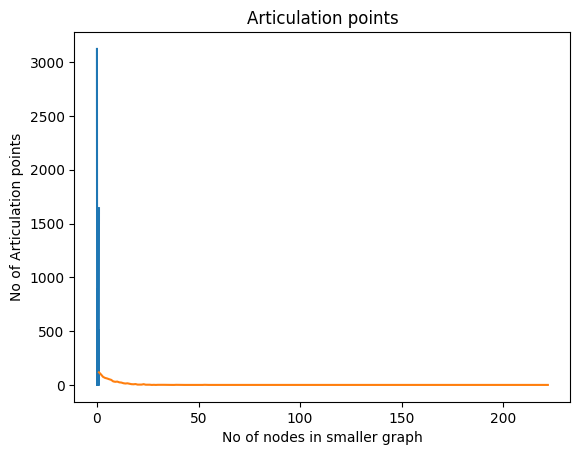

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Read the dataset using pandas
d1 = pd.read_csv('../Train_details_22122017.csv')

G = nx.Graph()
#Function to find the degree distribution from a list of degrees
#Returns a dictionary having the keys as degree and value as its number of occurences
def get_ddist(g):
    l = len(g)
    d = dict()
    for i in range(0,l):
        if g[i] in d.keys():
            d[g[i]] = d[g[i]] + 1
        else:
            d[g[i]] = 1
    return d

#Create the graph from dataset
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            distance = d1['Distance'][i+1] - d1['Distance'][i]
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1],weight=distance)
            
print("Graph formed successfully")
    
#getting a list of all the connected components in G
h = list(nx.connected_components(G))

#Selecting the largest connected component
G1 = nx.subgraph(G,h[0])
print("Largest connected graph formed successfully")

#Getting the degree distribution of G1
dict1 = dict(G1.degree())
dd = get_ddist(list(dict1.values()))
print("Got degree distribution")

#Sorting dd according to degree
degree_distribution_sorted = dict(sorted(dd.items()))

#FInding the APL of G1
#apl = nx.average_shortest_path_length(G1)

#Finding the average clustering co-efficient
acc = nx.clustering(G1)
print("Found acc")

#To plot the degree distribution
# plt.plot(dds.keys(),dds.values())
# plt.title('Degree distribution')
# plt.xlabel('Degree')
# plt.ylabel('No of nodes')

#To plot the variation of clustering co-efficient
acc_dict = dict(acc)
acc_dds = get_ddist(list(acc_dict.values()))
acc_distribution_sorted = dict(sorted(acc_dds.items()))
plt.plot(acc_distribution_sorted.keys(),acc_distribution_sorted.values())
plt.title('Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('No of nodes')
print("Maximum cc = " + str(max(acc_dict.values())))
print("Minimum cc = " + str(min(acc_dict.values())))

#To find the number of bridge links
bridge_links = list(nx.bridges(G1))

#To find the number of articulation points
ap = list(nx.articulation_points(G1))

#To find the most important articulation point
count = 0
c7 = 0
nap = np.empty((len(ap),3),dtype='S5')
for a in ap:
    G2 = nx.Graph(G1)
    G2.remove_node(a)
    h1 = list(nx.connected_components(G2))
    G21 = nx.subgraph(G2,h1[0])
    G22 = nx.subgraph(G2,h1[1])
    n1 = len(list(G21.nodes))
    n2 = len(list(G22.nodes))
    nap[count,0] = a
    nap[count,1] = str(n1)
    nap[count,2] = str(n2)
    count = count + 1
    
    if abs(n1 - n2) < 7000:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2)) 
        c7 = c7 + 1
    if abs(n1 - n2) < 7500 and count > 100 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
    if abs(n1 - n2) < 8000 and count > 200 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
lnap = nap[:,2]
knap = np.empty(len(lnap))
ic = 0
for i in lnap:
    knap[ic] = int(i)
    ic = ic + 1
apdict = dict()
ni = 0
for ni in range(len(nap)):
    k = int(nap[ni,2])
    if k in apdict.keys():
        apdict[k] = apdict[k] + 1
    else:
        apdict[k] = 1
dap = dict(sorted(apdict.items()))
plt.plot(dap.keys(),dap.values())
plt.title('Articulation points')
plt.xlabel('No of nodes in smaller graph')
plt.ylabel('No of Articulation points')

#Getting sorted order of important articulation points
ap_sm = dict()
for i in range(len(nap)):
    ap_sm[int(nap[i,2])] = (nap[i,0].decode('utf-8'))

ap_sms = dict(sorted(ap_sm.items()))

In [7]:
G.get_edge_data('KRMI','SWV')

{'weight': 50}

In [2]:
nodes = list(G.nodes())
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        if G.has_edge(nodes[i],nodes[j]):
            print(str(nodes[i]) + " " + str(nodes[j]) + " " + str(G.get_edge_data(nodes[i],nodes[j])))

SWV THVM {'weight': 32}
SWV KRMI {'weight': 50}
SWV MAO {'weight': 78}
SWV KUDL {'weight': 20}
SWV KKW {'weight': 49}
SWV RN {'weight': 160}
SWV PERN {'weight': 22}
SWV ZARP {'weight': 10}
SWV MADR {'weight': 8}
THVM KRMI {'weight': 17}
THVM MAO {'weight': 46}
THVM KUDL {'weight': 54}
THVM SNDD {'weight': 64}
THVM KKW {'weight': 82}
THVM RN {'weight': 193}
THVM PERN {'weight': 11}
THVM VSG {'weight': 71}
KRMI MAO {'weight': 29}
KRMI KUDL {'weight': 70}
KRMI RN {'weight': 210}
KRMI VEN {'weight': 16}
MAO KUDL {'weight': 101}
MAO KKW {'weight': 129}
MAO RN {'weight': 238}
MAO KAWR {'weight': 58}
MAO KT {'weight': 113}
MAO UD {'weight': 250}
MAO MAJN {'weight': 311}
MAO PERN {'weight': 57}
MAO SVM {'weight': 16}
MAO CNO {'weight': 33}
MAO VSG {'weight': 24}
MAO SRVX {'weight': 7}
MAO BLLI {'weight': 17}
MAO CNR {'weight': 9}
MAO SJDA {'weight': 6}
KUDL SNDD {'weight': 11}
KUDL KKW {'weight': 28}
KUDL RN {'weight': 139}
KUDL ZARP {'weight': 10}
SNDD KKW {'weight': 17}
SNDD RN {'weight': 12

DR BY {'weight': 4}
DR CLA {'weight': 7}
DR VK {'weight': 14}
DR GC {'weight': 11}
DR MTN {'weight': 2}
DR PR {'weight': 1}
TNA KYN {'weight': 21}
TNA LTT {'weight': 17}
TNA DIVA {'weight': 9}
TNA CLA {'weight': 18}
TNA DI {'weight': 15}
TNA KLVA {'weight': 3}
TNA MLND {'weight': 2}
TNA BND {'weight': 6}
TNA GC {'weight': 14}
TNA VSH {'weight': 18}
TNA BEPR {'weight': 23}
TNA NEU {'weight': 20}
KYN IGP {'weight': 83}
KYN NK {'weight': 134}
KYN LTT {'weight': 38}
KYN BSR {'weight': 41}
KYN NRL {'weight': 33}
KYN KSRA {'weight': 67}
KYN BIRD {'weight': 14}
KYN ULNR {'weight': 4}
KYN ABH {'weight': 6}
KYN SHAD {'weight': 3}
KYN TLA {'weight': 10}
KYN VLDI {'weight': 2}
KYN DI {'weight': 5}
KYN THK {'weight': 4}
IGP NK {'weight': 51}
IGP LTT {'weight': 121}
IGP CSN {'weight': 191}
IGP KSRA {'weight': 16}
IGP DVL {'weight': 45}
IGP GO {'weight': 9}
NK JL {'weight': 233}
NK LTT {'weight': 172}
NK DVL {'weight': 5}
NK LS {'weight': 49}
NK NR {'weight': 31}
NK ODHA {'weight': 12}
JL CSN {'weig

KTYM ERN {'weight': 59}
KTYM ERS {'weight': 60}
KTYM CGY {'weight': 17}
KTYM TRTR {'weight': 50}
KTYM VARD {'weight': 25}
KTYM PVRD {'weight': 31}
KTYM ETM {'weight': 10}
KTYM KRPP {'weight': 18}
KTYM CGV {'weight': 8}
KTYM KFQ {'weight': 4}
ERN AWY {'weight': 17}
ERN TCR {'weight': 72}
ERN ERS {'weight': 2}
ERN TRTR {'weight': 10}
ERN IPL {'weight': 6}
ERN PVRD {'weight': 28}
AWY TCR {'weight': 55}
AWY ERS {'weight': 19}
AWY CKI {'weight': 25}
AWY AFK {'weight': 10}
AWY IPL {'weight': 11}
AWY DINR {'weight': 22}
AWY CWR {'weight': 3}
AWY KLMR {'weight': 6}
TCR PGT {'weight': 76}
TCR ERS {'weight': 74}
TCR OTP {'weight': 44}
TCR SRR {'weight': 34}
TCR WKI {'weight': 16}
TCR IJK {'weight': 24}
TCR CKI {'weight': 30}
TCR AFK {'weight': 45}
TCR PNQ {'weight': 2}
TCR DINR {'weight': 33}
TCR PUK {'weight': 13}
TCR OLR {'weight': 7}
PGT CBE {'weight': 54}
PGT ERS {'weight': 150}
PGT OTP {'weight': 32}
PGT SRR {'weight': 44}
PGT PTJ {'weight': 48}
PGT PGTN {'weight': 4}
PGT KJKD {'weight': 14

WKR THAN {'weight': 27}
WKR MVI {'weight': 28}
WKR DL {'weight': 13}
WKR AXA {'weight': 7}
WKR SDD {'weight': 12}
WKR WKRC {'weight': 2}
WKR LXR {'weight': 5}
WKR MU {'weight': 16}
WKR DV {'weight': 11}
SUNR VG {'weight': 65}
SUNR ADI {'weight': 130}
SUNR DHG {'weight': 36}
SUNR THAN {'weight': 48}
SUNR SRGT {'weight': 3}
SUNR LTR {'weight': 21}
SUNR MOL {'weight': 21}
SUNR DXR {'weight': 14}
SUNR BLRD {'weight': 9}
SUNR CJR {'weight': 7}
VG ADI {'weight': 65}
VG MSH {'weight': 64}
VG DHG {'weight': 66}
VG SIOB {'weight': 182}
VG CLDY {'weight': 54}
VG JVN {'weight': 71}
VG SRGT {'weight': 67}
VG SBT {'weight': 60}
VG SAU {'weight': 37}
VG JKA {'weight': 12}
VG LTR {'weight': 43}
VG VNRD {'weight': 9}
VG JKS {'weight': 10}
ADI ND {'weight': 46}
ADI ANND {'weight': 64}
ADI BSR {'weight': 443}
ADI BCT {'weight': 490}
ADI MSH {'weight': 69}
ADI PNU {'weight': 134}
ADI ABR {'weight': 186}
ADI DHG {'weight': 131}
ADI SIOB {'weight': 248}
ADI SBI {'weight': 7}
ADI MAN {'weight': 3}
ADI CLDY 

DUI NBA {'weight': 27}
DUI MET {'weight': 17}
DUI SAG {'weight': 16}
DUI BNN {'weight': 31}
DUI BSS {'weight': 9}
DUI HMI {'weight': 9}
DUI KLSX {'weight': 8}
DUI ALAL {'weight': 13}
RPJ UBC {'weight': 20}
RPJ SIR {'weight': 26}
RPJ KNN {'weight': 44}
RPJ SMU {'weight': 11}
RPJ KLI {'weight': 11}
RPJ SBJ {'weight': 9}
JUDW DZP {'weight': 5}
JUDW RAA {'weight': 22}
JWP LRJ {'weight': 23}
JWP ATMO {'weight': 16}
JWP IKK {'weight': 5}
KQW REN {'weight': 7}
REN JAC {'weight': 15}
JAC JACN {'weight': 5}
PW KKNA {'weight': 6}
KKNA MBSK {'weight': 11}
SVO BLSD {'weight': 8}
TLC PIH {'weight': 12}
PIH LOHA {'weight': 12}
MIO SMNN {'weight': 5}
SMNN JOH {'weight': 4}
JOH DEP {'weight': 9}
PKY SSW {'weight': 6}
SSW KNZ {'weight': 10}
DZP MFB {'weight': 8}
MFB RAA {'weight': 9}
RAA TDW {'weight': 5}
TDW KES {'weight': 6}
KES DOKY {'weight': 6}
PTK BHRL {'weight': 3}
PTK KTHU {'weight': 23}
PTK MEX {'weight': 43}
PTK GSP {'weight': 36}
PTK DNN {'weight': 24}
PTK DLSR {'weight': 10}
BHRL SJNP {'wei

MEJ TEN {'weight': 28}
MEJ KDU {'weight': 14}
MEJ MVN {'weight': 23}
MEJ TN {'weight': 31}
MEJ KLPM {'weight': 12}
MEJ TAY {'weight': 22}
MEJ NRK {'weight': 6}
MEJ TIP {'weight': 16}
TEN VLY {'weight': 42}
TEN NCJ {'weight': 73}
TEN SDNR {'weight': 16}
TEN NNN {'weight': 28}
TEN NJT {'weight': 78}
TEN PCO {'weight': 5}
TEN MP {'weight': 3}
TEN TAY {'weight': 6}
TEN NRK {'weight': 22}
TEN TYT {'weight': 2}
MBM MSB {'weight': 11}
MBM MKK {'weight': 2}
MBM SP {'weight': 2}
MBM GDY {'weight': 4}
MBM STM {'weight': 6}
ERS CLT {'weight': 194}
ERS SRTL {'weight': 33}
ERS ALLP {'weight': 57}
ERS TRTR {'weight': 10}
ERS VARD {'weight': 34}
ERS TUVR {'weight': 23}
ERS KUMM {'weight': 7}
OTP SRR {'weight': 13}
OTP WKI {'weight': 29}
OTP PLPM {'weight': 3}
OTP MNUR {'weight': 7}
PER TRL {'weight': 36}
PER AVD {'weight': 15}
PER MSB {'weight': 6}
PER MMCC {'weight': 5}
PER BBQ {'weight': 4}
PER WST {'weight': 5}
PER VPY {'weight': 2}
PER VLK {'weight': 4}
SLO AKP {'weight': 117}
SLO ANV {'weight': 

DRU RRB {'weight': 6}
DRU CTA {'weight': 96}
DRU SHYP {'weight': 17}
RRB NVF {'weight': 10}
RRB AJP {'weight': 18}
RRB JRU {'weight': 68}
RRB TKE {'weight': 24}
RRB CTA {'weight': 89}
RRB SPV {'weight': 10}
NVF AJP {'weight': 8}
AJP SHV {'weight': 11}
AJP HSD {'weight': 21}
AJP JRU {'weight': 50}
SHV HSD {'weight': 10}
SHV JRU {'weight': 40}
HSD ABGT {'weight': 3}
HSD RGI {'weight': 10}
HSD JRU {'weight': 29}
ABGT RGI {'weight': 7}
RGI NLNR {'weight': 6}
RGI HLK {'weight': 10}
NLNR HLK {'weight': 4}
HLK JRU {'weight': 10}
JRU SLU {'weight': 9}
JRU MYK {'weight': 17}
JRU CTA {'weight': 21}
JRU AMC {'weight': 13}
JRU CKVD {'weight': 5}
SLU MYK {'weight': 8}
MYK KAG {'weight': 8}
KAG HNH {'weight': 5}
HNH THN {'weight': 6}
AVC HRR {'weight': 5}
HRR KMPS {'weight': 3}
HRR CLI {'weight': 9}
HRR RNR {'weight': 24}
HRR HVR {'weight': 55}
KMPS CLI {'weight': 6}
CLI RNR {'weight': 14}
RNR DAD {'weight': 8}
RNR BYD {'weight': 18}
RNR HVR {'weight': 33}
DAD BYD {'weight': 10}
BYD HVR {'weight': 1

WL MABD {'weight': 60}
WL KMT {'weight': 107}
WL PDPL {'weight': 82}
WL JMKT {'weight': 44}
WL MLY {'weight': 146}
WL KDM {'weight': 45}
WL NKD {'weight': 30}
WL CLE {'weight': 12}
WL KZJF {'weight': 9}
WL KZJE {'weight': 10}
MABD DKJ {'weight': 24}
MABD KMT {'weight': 48}
MABD KDM {'weight': 15}
MABD NKD {'weight': 31}
MABD GLA {'weight': 19}
MABD GUU {'weight': 11}
MABD TAA {'weight': 6}
DKJ KMT {'weight': 23}
DKJ PCZ {'weight': 8}
DKJ GLA {'weight': 5}
DKJ PPY {'weight': 9}
KMT MDR {'weight': 45}
KMT YP {'weight': 57}
KMT BKL {'weight': 27}
KMT PPY {'weight': 14}
KMT MLMG {'weight': 9}
KMT PNDP {'weight': 9}
KMT CKN {'weight': 16}
MDR KI {'weight': 38}
MDR YP {'weight': 14}
MDR BKL {'weight': 17}
MDR MTMI {'weight': 7}
MDR TNGM {'weight': 9}
NDO BPP {'weight': 20}
NDO TSR {'weight': 10}
NDO APL {'weight': 12}
NDO MCVM {'weight': 5}
NDO MDKU {'weight': 7}
BPP SPF {'weight': 7}
BPP APL {'weight': 8}
KVZ BTTR {'weight': 17}
KVZ SKM {'weight': 37}
KVZ SVPM {'weight': 12}
KVZ TTU {'weigh

DBB MTJR {'weight': 25}
MTJR BSI {'weight': 7}
BSI MONJ {'weight': 8}
BSI TPK {'weight': 17}
MONJ TPK {'weight': 9}
TPK SPX {'weight': 9}
SPX FKM {'weight': 9}
FKM GOGH {'weight': 23}
FKM KAMG {'weight': 48}
FKM CROA {'weight': 11}
SLKX BSGN {'weight': 7}
BSGN DTX {'weight': 8}
ATP DMM {'weight': 34}
ATP KLU {'weight': 27}
ATP PSPY {'weight': 4}
ATP TAC {'weight': 7}
DMM SSPN {'weight': 32}
DMM PKD {'weight': 54}
DMM HUP {'weight': 90}
DMM KRY {'weight': 67}
DMM MGB {'weight': 34}
DMM BSPL {'weight': 15}
DMM CCA {'weight': 12}
DMM CCI {'weight': 14}
DMM NGM {'weight': 14}
SSPN PKD {'weight': 20}
SSPN HUP {'weight': 57}
SSPN SBC {'weight': 149}
SSPN NRYP {'weight': 8}
SSPN KTCR {'weight': 3}
PKD HUP {'weight': 37}
PKD CPL {'weight': 14}
PKD NRYP {'weight': 12}
PKD MKJ {'weight': 12}
HUP GBD {'weight': 24}
HUP BNC {'weight': 105}
HUP DPE {'weight': 10}
HUP MLU {'weight': 10}
HUP CPL {'weight': 23}
MAG NGNT {'weight': 19}
MAG NBR {'weight': 11}
MAG KCC {'weight': 7}
JGM SUA {'weight': 15}

DPJ OML {'weight': 54}
DPJ PCV {'weight': 21}
DPJ SZV {'weight': 10}
OML MCRD {'weight': 16}
OML SMDT {'weight': 5}
KSRA ATG {'weight': 26}
KSRA KE {'weight': 13}
KSRA OMB {'weight': 8}
DVL LT {'weight': 11}
NGN PJN {'weight': 7}
NGN PKE {'weight': 10}
PC KJ {'weight': 25}
PC GAA {'weight': 11}
PC PHQ {'weight': 7}
RV NB {'weight': 10}
RV WGA {'weight': 10}
NPNR CDI {'weight': 8}
NPNR MWA {'weight': 5}
KKN CAER {'weight': 31}
KKN BRUD {'weight': 20}
KKN DRHI {'weight': 11}
KKN BRI {'weight': 13}
TBN BPF {'weight': 28}
TBN CRK {'weight': 7}
TBN PGL {'weight': 14}
MDDP HBJ {'weight': 16}
MDDP ODG {'weight': 14}
MDDP MSO {'weight': 10}
HBJ BZU {'weight': 192}
HBJ ODG {'weight': 30}
HBJ SJP {'weight': 87}
HBJ DEE {'weight': 696}
HBJ MSO {'weight': 6}
BAQ GLG {'weight': 18}
BAQ MABA {'weight': 28}
BAQ BET {'weight': 10}
BAQ KAH {'weight': 19}
BAQ PAI {'weight': 9}
BAB TBT {'weight': 25}
BAB BZY {'weight': 12}
BAB BPW {'weight': 4}
BAB KHJ {'weight': 9}
CGN AIT {'weight': 58}
CGN MOTH {'weig

SED VJR {'weight': 9}
CNC RBG {'weight': 10}
RBG CKR {'weight': 15}
NVS BL {'weight': 39}
NVS BIM {'weight': 21}
NVS AML {'weight': 15}
NVS MRL {'weight': 8}
NVS VDH {'weight': 8}
NVS GNST {'weight': 3}
BIRD DIVA {'weight': 14}
BIRD DTVL {'weight': 14}
BIRD KHBV {'weight': 8}
BIRD DDCL {'weight': 8}
JNH MAY {'weight': 25}
JNH PLP {'weight': 23}
JNH ZBD {'weight': 43}
JNH PBH {'weight': 53}
JNH BOY {'weight': 31}
JNH URPR {'weight': 14}
JNH SAW {'weight': 16}
JNH SQN {'weight': 5}
JNH BSE {'weight': 17}
JNH BYHA {'weight': 9}
JNH JUA {'weight': 10}
JNH NBP {'weight': 10}
MAY ZBD {'weight': 18}
MAY WRGN {'weight': 3}
MAY SPPR {'weight': 6}
KRND SMZ {'weight': 9}
KRND AMH {'weight': 35}
KRND DJD {'weight': 7}
SMZ AMH {'weight': 26}
SMZ SJER {'weight': 5}
AMH MMA {'weight': 21}
AMH SAA {'weight': 13}
AMH SDHA {'weight': 3}
AMH RKS {'weight': 8}
PLP PRG {'weight': 30}
PLP PFM {'weight': 23}
PLP URPR {'weight': 9}
PLP SYC {'weight': 11}
ZBD SLN {'weight': 92}
ZBD JOP {'weight': 7}
ZBD KSF {'

JOB KKU {'weight': 28}
JOB HDA {'weight': 10}
JOB DHND {'weight': 6}
JOB BOBS {'weight': 7}
JOB SHNX {'weight': 14}
KKU SHNX {'weight': 14}
KKU DNK {'weight': 10}
KKU BDYK {'weight': 5}
UMRI KEK {'weight': 16}
UMRI SVN {'weight': 14}
UMRI SLGH {'weight': 8}
UMRI BLSA {'weight': 8}
KTES KHBJ {'weight': 52}
KTES NKJ {'weight': 5}
KTES NWR {'weight': 12}
KTES JLW {'weight': 14}
BRS NRZB {'weight': 7}
BRS GGT {'weight': 17}
BRS BDWA {'weight': 29}
BRS MDXR {'weight': 5}
BUH AAL {'weight': 8}
BUH SNGP {'weight': 14}
BUH CHDX {'weight': 6}
KTMA BJRI {'weight': 15}
KTMA HRV {'weight': 9}
KTMA BATL {'weight': 9}
BJRI BRH {'weight': 52}
BJRI BATL {'weight': 6}
BJRI BRND {'weight': 10}
BJRI MDGR {'weight': 16}
BRH KTO {'weight': 17}
BRH NGE {'weight': 8}
KTO BSPR {'weight': 39}
KTO SPDR {'weight': 10}
BSPR ABKP {'weight': 19}
BSPR KJZ {'weight': 13}
BSPR KLPG {'weight': 11}
ABKP KLPG {'weight': 8}
SMT DWG {'weight': 9}
BET KAH {'weight': 9}
JRK NOI {'weight': 16}
JRK SMRR {'weight': 9}
JRK ISH {

SPE NYP {'weight': 27}
SPE GPD {'weight': 35}
SPE TADA {'weight': 13}
SPE AKAT {'weight': 5}
SPE PEL {'weight': 8}
BDJ QLD {'weight': 22}
BDJ MAHE {'weight': 13}
BDJ PYOL {'weight': 9}
BDJ NAU {'weight': 5}
BDJ IGL {'weight': 6}
PML SPL {'weight': 6}
PML PDV {'weight': 3}
IGU SNO {'weight': 15}
IGU SHI {'weight': 4}
IGU SUU {'weight': 6}
SRTN MRHT {'weight': 38}
SRTN SLGR {'weight': 16}
SRTN DSX {'weight': 9}
MRHT DBRG {'weight': 41}
MRHT SLGR {'weight': 53}
MRHT DMGN {'weight': 28}
MRHT MOX {'weight': 5}
MRHT KOWN {'weight': 12}
DBRG DBRT {'weight': 8}
DBRG NTSK {'weight': 41}
DBRG DMGN {'weight': 13}
DBRG CHB {'weight': 24}
NHLN GMTO {'weight': 9}
NR KBSN {'weight': 6}
NR UGN {'weight': 7}
BRJN BPH {'weight': 9}
BRJN IB {'weight': 3}
BYNR ANKL {'weight': 98}
BYNR BIJR {'weight': 8}
BYNR SHMI {'weight': 8}
SL MAQ {'weight': 28}
SL TOK {'weight': 7}
BRZ BLZ {'weight': 15}
BRZ KAGR {'weight': 6}
BRZ DTW {'weight': 8}
BLZ DTW {'weight': 7}
BLZ NPX {'weight': 8}
MAUR KTKL {'weight': 7}
MA

BTA NEO {'weight': 11}
BTA SDE {'weight': 5}
BTA KWR {'weight': 8}
BTA KUA {'weight': 12}
BTA PAIL {'weight': 5}
BTA PATL {'weight': 2}
BEA RPR {'weight': 14}
BEA DURE {'weight': 30}
BEA BYN {'weight': 5}
BEA KRS {'weight': 12}
BEA ASJP {'weight': 4}
RPR DURE {'weight': 16}
RPR BYN {'weight': 9}
RPR TWG {'weight': 9}
RPR SKRI {'weight': 6}
DURE TWG {'weight': 7}
DURE BUE {'weight': 7}
GMR CSA {'weight': 9}
GMR BWH {'weight': 8}
GMR BQW {'weight': 6}
GMR KKRH {'weight': 3}
ZNA BWH {'weight': 22}
ZNA DHA {'weight': 13}
ZNA SLD {'weight': 26}
ZNA DRV {'weight': 6}
ZNA BHCL {'weight': 5}
SGG BUP {'weight': 18}
SGG AKN {'weight': 10}
SGG KPRD {'weight': 13}
SGG MVV {'weight': 0}
SGG GNNA {'weight': 7}
SGG AJUG {'weight': 2}
SGG KMGH {'weight': 4}
BUP RPUR {'weight': 4}
BUP KPRD {'weight': 5}
BUP RIKD {'weight': 2}
KJH UREN {'weight': 4}
KJH DNRE {'weight': 10}
KJH GIBP {'weight': 6}
BRYA MKB {'weight': 10}
BRYA DMRX {'weight': 5}
BRYA DKGS {'weight': 17}
BRYA RDUM {'weight': 6}
BRYA HTZU {'

NRDP VLG {'weight': 10}
MTM CLU {'weight': 4}
CLU PAV {'weight': 6}
PAV VMD {'weight': 7}
VMD KVM {'weight': 5}
KVM GVL {'weight': 3}
GVL NUJ {'weight': 5}
KI YP {'weight': 24}
KI RYP {'weight': 5}
KI GNN {'weight': 14}
KI CVV {'weight': 7}
OEA PTKP {'weight': 3}
OEA KOLR {'weight': 6}
RVKH MMZ {'weight': 4}
SRNR WPR {'weight': 9}
SRNR AJK {'weight': 4}
SRNR ARPL {'weight': 4}
MAGH VHGN {'weight': 9}
BTBR BOK {'weight': 8}
BTBR GMG {'weight': 9}
UR FM {'weight': 13}
UR BDVL {'weight': 6}
UR TMX {'weight': 17}
WPR MHBT {'weight': 41}
WPR KQQ {'weight': 19}
WPR KONN {'weight': 5}
WPR AJK {'weight': 6}
OBVP PMT {'weight': 11}
OBVP ANE {'weight': 6}
OBVP RPL {'weight': 8}
CNI BBM {'weight': 22}
CNI KND {'weight': 14}
CNI GMH {'weight': 26}
CNI TUL {'weight': 37}
CNI NIM {'weight': 9}
CNI MIK {'weight': 6}
CNI GDBR {'weight': 8}
PRP TKN {'weight': 12}
PRP GJD {'weight': 34}
PRP GAP {'weight': 12}
PRP BNSL {'weight': 7}
SCM MIPM {'weight': 4}
SCM SCMN {'weight': 1}
SCM PDT {'weight': 10}
PVP

SGJ SYK {'weight': 10}
SGJ RES {'weight': 11}
SAN AMG {'weight': 43}
SAN MLD {'weight': 24}
SAN RBD {'weight': 11}
SAN UTA {'weight': 5}
AJI TDP {'weight': 8}
AJI AIG {'weight': 7}
AJI SHRM {'weight': 5}
TLH PMR {'weight': 33}
TLH BTRA {'weight': 10}
TLH MK {'weight': 10}
TLH BLPU {'weight': 17}
TLH BHDH {'weight': 6}
PMR AO {'weight': 40}
PMR BLPU {'weight': 16}
PMR TSA {'weight': 9}
PMR RYS {'weight': 9}
NRS MIL {'weight': 8}
NRS BTO {'weight': 13}
NRS DAN {'weight': 7}
RWL DWO {'weight': 21}
RWL VRH {'weight': 6}
RWL QSR {'weight': 11}
RWL MOTC {'weight': 7}
DWO HRW {'weight': 11}
DWO QSR {'weight': 10}
KS MIH {'weight': 11}
KS MNKN {'weight': 5}
BDH PCQ {'weight': 5}
MLV TPF {'weight': 6}
MLV GHLE {'weight': 8}
NHT MRR {'weight': 17}
NHT MGAE {'weight': 16}
NHT CTR {'weight': 9}
NHT TKP {'weight': 7}
NHT SDLE {'weight': 8}
MRR RJG {'weight': 12}
MRR BSBR {'weight': 5}
MRR CTR {'weight': 8}
RJG BSBR {'weight': 7}
RJG NGF {'weight': 6}
TDLE SXP {'weight': 8}
TDLE BDBS {'weight': 1}
T

HPLE KKTA {'weight': 5}
HPLE JDPT {'weight': 1}
HPLE GIF {'weight': 2}
KKTA GIF {'weight': 3}
PPN PFT {'weight': 5}
PPN NDW {'weight': 10}
PPN PRBZ {'weight': 7}
PPN PNUG {'weight': 1}
PPN JTDM {'weight': 2}
PFT NDW {'weight': 5}
PFT JTDM {'weight': 3}
PFT NEMA {'weight': 4}
NDW NEMA {'weight': 1}
NDU KRON {'weight': 4}
NDU TNRI {'weight': 2}
THA MDE {'weight': 4}
THA NZP {'weight': 4}
MDE BELA {'weight': 11}
MDE WW {'weight': 5}
BELA BBHT {'weight': 3}
BELA NYM {'weight': 5}
BELA CKH {'weight': 10}
KSTA PRY {'weight': 7}
TETA SUD {'weight': 9}
TETA AHL {'weight': 4}
SUD SJGM {'weight': 4}
SUD AHL {'weight': 4}
KWE KMPH {'weight': 3}
KWE BAHN {'weight': 2}
LKN DPL {'weight': 5}
LKN SANH {'weight': 6}
HTZU RJO {'weight': 3}
BNV BNQ {'weight': 6}
GQN PIRO {'weight': 20}
GQN UWNR {'weight': 13}
GQN SRMN {'weight': 5}
PIRO XBKJ {'weight': 18}
PIRO CRQ {'weight': 9}
PIRO NON {'weight': 5}
XBKJ GNK {'weight': 21}
XBKJ HSB {'weight': 12}
XBKJ GAHT {'weight': 3}
GNK SJV {'weight': 9}
GNK BMHT 

KKAH MLJ {'weight': 8}
MLJ UTR {'weight': 8}
UTR BHAW {'weight': 5}
UTR BKKS {'weight': 6}
BHAW LBH {'weight': 4}
PFR UDK {'weight': 13}
KHRJ VJP {'weight': 19}
KHRJ RGG {'weight': 12}
MKH MWW {'weight': 8}
MKH DGW {'weight': 8}
NRI TL {'weight': 30}
NRI DTRA {'weight': 5}
HVD MALB {'weight': 45}
MALB MVI {'weight': 47}
MALB WWA {'weight': 14}
DUB KEG {'weight': 6}
DUB AFR {'weight': 10}
DUB PRKE {'weight': 5}
BTO PKRA {'weight': 5}
BTO DAN {'weight': 7}
ANVR MWC {'weight': 4}
ANVR CNJ {'weight': 2}
MINA TRWT {'weight': 17}
MINA RSJ {'weight': 9}
MDNR GZN {'weight': 22}
MDNR MUD {'weight': 10}
MDNR GUH {'weight': 18}
MDNR MUZ {'weight': 8}
AGA JAB {'weight': 2}
HSI BWL {'weight': 24}
HSI KNAR {'weight': 5}
HSI AIA {'weight': 11}
KRLR MCQ {'weight': 8}
KRLR ANPR {'weight': 11}
KRLR CHRK {'weight': 5}
MCQ KDRD {'weight': 10}
MQX RMF {'weight': 12}
BCU BTIC {'weight': 9}
BCU LHM {'weight': 8}
MRND KRLI {'weight': 8}
MRND BSPN {'weight': 15}
MRND KARR {'weight': 19}
KRLI MNPR {'weight': 9}

KUMB PJPT {'weight': 7}
SAHI MSHW {'weight': 4}
SAHI RSWN {'weight': 4}
KCT GNGL {'weight': 5}
BRU KPB {'weight': 8}
PNYA VKNR {'weight': 13}
TSF SDAM {'weight': 11}
TSF PPE {'weight': 10}
BVN SYU {'weight': 14}
BVN RAMR {'weight': 10}
BVN SKLP {'weight': 7}
APD APDC {'weight': 3}
APD BSW {'weight': 9}
JPZ AYU {'weight': 16}
JPZ PNVT {'weight': 39}
SCE NGAN {'weight': 6}
SCE BEE {'weight': 4}
SCE HBN {'weight': 4}
NGAN AONI {'weight': 26}
NGAN PUQ {'weight': 10}
AONI JKB {'weight': 20}
AONI SMGR {'weight': 8}
AONI SLON {'weight': 5}
JKB SHTT {'weight': 8}
JKB SLON {'weight': 9}
PSR GAI {'weight': 8}
PSR BRKB {'weight': 6}
JLS CMR {'weight': 6}
JLS PORA {'weight': 10}
CHL GNRL {'weight': 5}
CHL WAIR {'weight': 5}
NNGE PHI {'weight': 5}
SZR BXP {'weight': 10}
SZR NJN {'weight': 8}
BXP BHGN {'weight': 8}
KXL TTB {'weight': 17}
KXL CFG {'weight': 6}
TTB CFG {'weight': 11}
TTB KQY {'weight': 7}
NCH AGI {'weight': 17}
NCH LH {'weight': 6}
AGI NMT {'weight': 11}
AGI SLX {'weight': 6}
NMT MZA 

TIU ULM {'weight': 9}
TIU HCM {'weight': 6}
PDU DUSI {'weight': 9}
PDU SGDM {'weight': 10}
AL MCLE {'weight': 2}
AL VND {'weight': 13}
AL RLG {'weight': 4}
MXT FM {'weight': 6}
MXT DQR {'weight': 1}
FM BDVL {'weight': 7}
FM HPG {'weight': 1}
FM NSVP {'weight': 5}
BDVL NSVP {'weight': 2}
TMX HBLN {'weight': 4}
TMX KOTT {'weight': 3}
HBLN KOTT {'weight': 2}
SBBJ MOA {'weight': 14}
SBBJ ALPR {'weight': 2}
MUGR BDCR {'weight': 49}
MUGR AWM {'weight': 7}
BDCR BTPD {'weight': 10}
BDCR GLE {'weight': 11}
BTPD TPY {'weight': 7}
TPY CMW {'weight': 9}
CMW GHPU {'weight': 8}
GHPU KRA {'weight': 5}
KRA PCZ {'weight': 9}
AKE MZL {'weight': 9}
AKE SNPH {'weight': 4}
AKE BKU {'weight': 8}
MZL WDR {'weight': 7}
MZL SNPH {'weight': 6}
WDR ME {'weight': 11}
WDR SHAN {'weight': 7}
PDKN NBR {'weight': 2}
RYP CVV {'weight': 12}
RYP NWBV {'weight': 4}
BKL CKN {'weight': 12}
BKL NVC {'weight': 6}
BKL MTMI {'weight': 10}
GLA GUU {'weight': 8}
KCC PVD {'weight': 7}
KCC KAQ {'weight': 3}
NRT DKD {'weight': 75}


PAO HAT {'weight': 4}
NIU CVJ {'weight': 6}
NIU VRE {'weight': 7}
ITA KSPR {'weight': 3}
ITA VRM {'weight': 4}
VDA BJW {'weight': 13}
VDA RNO {'weight': 7}
VDA NDR {'weight': 5}
VDA ADD {'weight': 5}
VDA BETI {'weight': 5}
KBRV UTD {'weight': 5}
KBRV VTL {'weight': 6}
BJD KANJ {'weight': 5}
BJD GER {'weight': 3}
BJD VTA {'weight': 9}
SBT CLDB {'weight': 3}
ABD SAU {'weight': 12}
SAU CE {'weight': 11}
CE JKA {'weight': 14}
CE VCN {'weight': 7}
JKA VCN {'weight': 7}
GOP BNVD {'weight': 18}
BNVD JSPR {'weight': 14}
SKR RWO {'weight': 14}
SKR TRSR {'weight': 3}
SKR RNBD {'weight': 2}
RWO TRSR {'weight': 16}
RWO RNBD {'weight': 11}
CPN LAN {'weight': 6}
CPN BKRL {'weight': 6}
SAT CCL {'weight': 9}
MAM USRA {'weight': 7}
BIO ANAS {'weight': 8}
PCN AGR {'weight': 10}
PCN BJG {'weight': 6}
BOG RTI {'weight': 12}
RTI BILD {'weight': 7}
BILD MRN {'weight': 9}
BOD RNH {'weight': 7}
THUR TLZ {'weight': 9}
JHW DKRA {'weight': 7}
GQL KPTN {'weight': 8}
GQL THEA {'weight': 18}
KPTN KPZ {'weight': 20}

RSLR PLAE {'weight': 4}
PLAE SKG {'weight': 4}
SKG GRP {'weight': 5}
SKG PRAE {'weight': 5}
GRP PRAE {'weight': 10}
HBE FLU {'weight': 5}
FLU BTKB {'weight': 4}
FLU STB {'weight': 7}
BTKB STB {'weight': 3}
BPD DHU {'weight': 6}
DHU MGM {'weight': 6}
BFT SGV {'weight': 4}
SGV NBPH {'weight': 3}
KRP PRTL {'weight': 6}
BLYG BLYH {'weight': 4}
BLYH RCD {'weight': 2}
RCD DKAE {'weight': 5}
DKAE GBRA {'weight': 2}
DKAE JOX {'weight': 5}
DKAE BZL {'weight': 4}
GBRA JOX {'weight': 3}
JOX BPAE {'weight': 2}
BPAE BRPA {'weight': 4}
BRPA MBE {'weight': 3}
CG TLX {'weight': 6}
TLX BTPG {'weight': 4}
NBRN GGP {'weight': 4}
NBRN CPHT {'weight': 2}
GGP MAJ {'weight': 4}
MAJ AKIP {'weight': 4}
AKIP GN {'weight': 4}
GN STBB {'weight': 6}
URP KLW {'weight': 4}
KLW KNJI {'weight': 5}
KNJI NCP {'weight': 8}
NCP KHGR {'weight': 8}
KHGR KWDP {'weight': 3}
KWDP NMKA {'weight': 13}
DH BSD {'weight': 4}
DH GURN {'weight': 2}
BSD NTA {'weight': 3}
BSD GURN {'weight': 2}
NTA D {'weight': 2}
D MGT {'weight': 10}


SSV FSG {'weight': 6}
FSG ALN {'weight': 6}
ALN SHIV {'weight': 9}
DNJ WLH {'weight': 9}
SLP AKI {'weight': 8}
NDE MDVR {'weight': 9}
BYC KDN {'weight': 15}
GNR PKL {'weight': 12}
PKL KGW {'weight': 7}
BNA SOQ {'weight': 8}
SOQ RLP {'weight': 9}
CTH KMV {'weight': 14}
SVD KODI {'weight': 10}
KODI RNE {'weight': 11}
RNE PDG {'weight': 7}
UPR SCO {'weight': 9}
DAV PG {'weight': 7}
PIZ MQL {'weight': 6}
CRU LBG {'weight': 10}
LBG WNG {'weight': 5}
PARD MGC {'weight': 4}
PARD MTDI {'weight': 7}
SVN SLGH {'weight': 6}
FKB NVT {'weight': 7}
NVT JKM {'weight': 8}
JKM YDP {'weight': 13}
GTU MRTY {'weight': 4}
OSA MRX {'weight': 5}
OSA DKY {'weight': 34}
MRX DKY {'weight': 16}
DKY KMRD {'weight': 7}
KMRD YSI {'weight': 10}
WSD JVA {'weight': 9}
SNGR PKNS {'weight': 10}
PKNS DNDI {'weight': 4}
WDN UKH {'weight': 5}
MDGR CHRM {'weight': 22}
MDGR PRDL {'weight': 11}
CHRM PRDL {'weight': 11}
MDVK SRKI {'weight': 5}
SRKI KXB {'weight': 8}
RTWS ORR {'weight': 4}
ORR HPKA {'weight': 4}
RIKA SHDR {'wei

DCK RY {'weight': 7}
DCK LHBK {'weight': 33}
RY DIBL {'weight': 4}
DIBL HLB {'weight': 9}
HLB LO {'weight': 4}
LO LHBK {'weight': 8}
LHBK AEJ {'weight': 5}
AEJ KTGD {'weight': 7}
KTGD GS {'weight': 9}
KTGD DOK {'weight': 18}
GS DOK {'weight': 9}
DOK VLA {'weight': 13}
VLA MQA {'weight': 7}
VLA MORA {'weight': 14}
VLA SEJ {'weight': 23}
MQA MORA {'weight': 7}
MORA SEJ {'weight': 9}
SEJ VTP {'weight': 3}
VTP GG {'weight': 6}
JBB GRHM {'weight': 5}
GRHM PCC {'weight': 6}
PCC VLDR {'weight': 4}
PCC SDHR {'weight': 5}
VLDR JVL {'weight': 7}
JVL HRM {'weight': 9}
HRM GEG {'weight': 9}
GEG UNA {'weight': 16}
UNA DVA {'weight': 5}
JCN BILK {'weight': 11}
BILK TORA {'weight': 6}
KODR GTWD {'weight': 16}
GTWD SDHR {'weight': 5}
PTP KKD {'weight': 10}
KKD CRL {'weight': 10}
CRL MKT {'weight': 12}
MKT BWW {'weight': 16}
BWW OM {'weight': 5}
OM SWD {'weight': 5}
SHBL GGLE {'weight': 3}
SHBL NBKH {'weight': 4}
GGLE JHBN {'weight': 3}
MHTR TYAE {'weight': 4}
TYAE MIAN {'weight': 4}
CWLE KNSN {'weight

DDK SWX {'weight': 6}
MLKH SDZ {'weight': 4}
SDZ KGKD {'weight': 5}
DNX BXC {'weight': 20}
DNX RPHR {'weight': 7}
BXC UKN {'weight': 15}
BXC DULP {'weight': 9}
UKN JPS {'weight': 22}
UKN DULP {'weight': 5}
UKN GJW {'weight': 9}
JPS GJW {'weight': 14}
JPS PLT {'weight': 9}
JPS KUDN {'weight': 5}
HMR DIW {'weight': 11}
BBKR BTR {'weight': 6}
BTR TRA {'weight': 6}
CRW BVZ {'weight': 6}
JUP LSE {'weight': 7}
JUP SURP {'weight': 16}
LSE SURP {'weight': 9}
GJW PLT {'weight': 5}
KNG JNT {'weight': 10}
CHN BATM {'weight': 6}
SOHL JHWR {'weight': 4}
PMQ JK {'weight': 7}
JK SRM {'weight': 5}
SCPD AWL {'weight': 11}
AWL KKL {'weight': 5}
KZX GSB {'weight': 5}
GILA KNDI {'weight': 5}
JJJ MGWD {'weight': 5}
MGWD SQJ {'weight': 4}
SQJ SNB {'weight': 4}
SNB GSR {'weight': 5}
GSR NSS {'weight': 13}
NSS KYY {'weight': 5}
KYY KHHJ {'weight': 4}
KHHJ BXB {'weight': 3}
BXB MXP {'weight': 4}
MXP BHM {'weight': 5}
BHM KASH {'weight': 6}
KASH MYE {'weight': 2}
JKZ AUN {'weight': 2}
NAS SCQ {'weight': 8}
DAVJ

BRAM NEM {'weight': 5}
EVA KFI {'weight': 3}
SGLM MP {'weight': 11}
TAY NRK {'weight': 15}
TAY GDN {'weight': 8}
EDU PALM {'weight': 24}
PALM VEI {'weight': 14}
SNO SUU {'weight': 9}
SNO VNJ {'weight': 9}
VZ IGR {'weight': 8}
IGR PY {'weight': 6}
PY TPM {'weight': 7}
NRK GDN {'weight': 8}
MDKI ETMD {'weight': 5}
ETMD WRA {'weight': 9}
WRA KJKD {'weight': 11}
PLL MNY {'weight': 7}
MNY LDY {'weight': 8}
LDY PLPM {'weight': 4}
MNUR VTK {'weight': 10}
PUM PEU {'weight': 5}
PUM KODN {'weight': 4}
NAU MUKE {'weight': 4}
VTK MUC {'weight': 4}
KRAN KUC {'weight': 4}
NLPD PRCA {'weight': 6}
PRCA PPM {'weight': 10}
PPM NDPU {'weight': 7}
PPM STUR {'weight': 14}
NDPU STUR {'weight': 6}
MUK SAB {'weight': 8}
SAB VLE {'weight': 3}
SAB SYM {'weight': 12}
VLE SYM {'weight': 8}
CEM GKM {'weight': 6}
JBK SDV {'weight': 12}
SDV GMA {'weight': 5}
GMA YADA {'weight': 2}
CMZ GZL {'weight': 11}
PNM KEF {'weight': 10}
RGM MLK {'weight': 12}
MYL LMD {'weight': 8}
EDD TGL {'weight': 9}
BLL BNL {'weight': 7}
BL

FPS LNH {'weight': 20}
FPS QMRS {'weight': 12}
LNH RDK {'weight': 12}
SAS CKS {'weight': 14}
CKS CHNN {'weight': 10}
BSSL PSLI {'weight': 15}
PSLI BNDI {'weight': 10}
URML JNRI {'weight': 7}
JNRI SNAR {'weight': 23}
NNE RYT {'weight': 3}
AXK AAH {'weight': 7}
UDMR JATP {'weight': 5}
CYI PIO {'weight': 7}
PIO AIR {'weight': 6}
KIZ CCL {'weight': 7}
USRA JKT {'weight': 7}
JKT RET {'weight': 6}
SSNR BDME {'weight': 1}
NEWC JEP {'weight': 6}
KNRI MWZ {'weight': 3}
CEME CDB {'weight': 3}
CDB KRMB {'weight': 4}
YGM BSCP {'weight': 5}
BSCP NGY {'weight': 2}
NGY DLW {'weight': 5}
DLW LBZ {'weight': 5}
LPNR SWNR {'weight': 2}
SWNR LDCY {'weight': 1}
LDCY SOJ {'weight': 2}
CNKP SDPR {'weight': 0}
SDPR BRSQ {'weight': 4}
BRSQ DLPI {'weight': 1}
DLPI NRVR {'weight': 1}
NRVR KRTN {'weight': 2}
MWUE KLA {'weight': 5}
KLA SOM {'weight': 11}
SOM DAR {'weight': 10}
DAR KAMP {'weight': 5}
SKQ GNRL {'weight': 5}
WAIR DKDE {'weight': 8}
DKDE AJR {'weight': 8}
AJR BRKY {'weight': 5}
SBJ SDY {'weight': 8}
A

{1: 122, 2: 4412, 3: 1039, 4: 866, 5: 486, 6: 323, 7: 183, 8: 148, 9: 106, 10: 80, 11: 51, 12: 42, 13: 33, 14: 39, 15: 23, 16: 21, 17: 13, 18: 15, 19: 6, 20: 10, 21: 9, 22: 4, 23: 6, 24: 2, 25: 3, 26: 1, 27: 1, 28: 5, 29: 2, 30: 2, 32: 2, 33: 1, 34: 1, 39: 2, 44: 1}
Logx: 
[0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624, 0.6989700043360189, 0.7781512503836436, 0.8450980400142568, 0.9030899869919435, 0.9542425094393249, 1.0, 1.0413926851582251, 1.0791812460476249, 1.1139433523068367, 1.146128035678238, 1.1760912590556813, 1.2041199826559248, 1.2304489213782739, 1.255272505103306, 1.2787536009528289, 1.3010299956639813, 1.3222192947339193, 1.3424226808222062, 1.3617278360175928, 1.380211241711606, 1.3979400086720377, 1.414973347970818, 1.4313637641589874, 1.4471580313422192, 1.462397997898956, 1.4771212547196624, 1.505149978319906, 1.5185139398778875, 1.5314789170422551, 1.591064607026499, 1.6434526764861874]
Logy: 
[-1.8199752111303424, -0.26169953803693763, -0.8897194

Text(0, 0.5, 'P(k)')

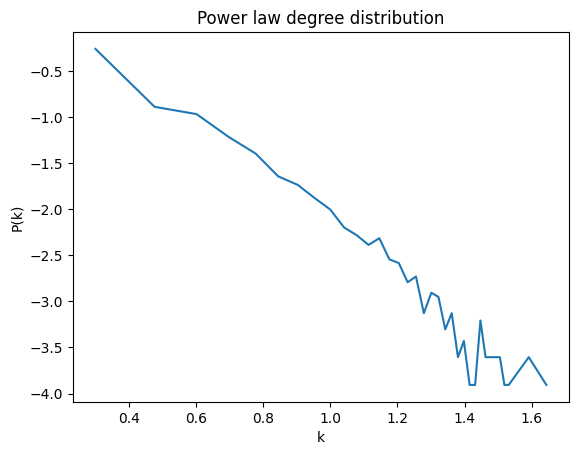

In [37]:
degree_distribution_sorted = dict(sorted(dd.items()))
print(degree_distribution_sorted)
degree_prob = dict()
keys = list(degree_distribution_sorted.keys())
total_nodes = sum(degree_distribution_sorted.values())
for i in range(len(degree_distribution_sorted)):
    degree_prob[keys[i]] = degree_distribution_sorted[keys[i]]/total_nodes
#logx = list(np.log10(list(degree_prob.keys())))
logx = (list(np.log10(list(degree_prob.keys()))))
logy = (list(np.log10(list(degree_prob.values()))))
print("Logx: ")
print(logx)
print("Logy: ")
print(logy)
plt.plot(logx[1:],logy[1:])
# plt.xscale('log')
# plt.yscale('log')
plt.title("Power law degree distribution")
plt.xlabel("k")
plt.ylabel("P(k)")

In [38]:
apl = nx.average_shortest_path_length(G1)
print("Log N = " + str(np.log((8060))))
print("Log log N = " + str(np.log(np.log(8060))))


Log N = 8.994668835500674
Log log N = 2.1966320502156553


In [39]:
print(apl)

11.028701293223026


In [44]:
#To get average degree
average_degree_sum = 0;
keys = list(degree_distribution_sorted.keys())
values = list(degree_distribution_sorted.values())
for i in range(len(degree_distribution_sorted)):
    average_degree_sum = average_degree_sum + keys[i] * values[i]
average_degree = average_degree_sum/sum(values)
print("Average degree = " + str(average_degree))

Average degree = 3.5660049627791564


In [45]:
logx[1:]

[0.3010299956639812,
 0.47712125471966244,
 0.6020599913279624,
 0.6989700043360189,
 0.7781512503836436,
 0.8450980400142568,
 0.9030899869919435,
 0.9542425094393249,
 1.0,
 1.0413926851582251,
 1.0791812460476249,
 1.1139433523068367,
 1.146128035678238,
 1.1760912590556813,
 1.2041199826559248,
 1.2304489213782739,
 1.255272505103306,
 1.2787536009528289,
 1.3010299956639813,
 1.3222192947339193,
 1.3424226808222062,
 1.3617278360175928,
 1.380211241711606,
 1.3979400086720377,
 1.414973347970818,
 1.4313637641589874,
 1.4471580313422192,
 1.462397997898956,
 1.4771212547196624,
 1.505149978319906,
 1.5185139398778875,
 1.5314789170422551,
 1.591064607026499,
 1.6434526764861874]

In [13]:
print(np.log10(10))

1.0


In [7]:
n1 = list(G1.neighbors(ap[0]))
print("AP: " + str(ap[0]))
print("Its neighbors are:")
print(n1[0])

AP: PNQ
Its neighbors are:
TCR


In [13]:
def get_max_disconnected_points(G1):
    ap = list(nx.articulation_points(G1))

    #To find the most important articulation point
    count = 0
    c7 = 0
    nap = np.empty((len(ap),3),dtype='S5')
    nap_i = np.empty(len(ap))
    for a in ap:
        G2 = nx.Graph(G1)
        G2.remove_node(a)
        h1 = list(nx.connected_components(G2))
        G21 = nx.subgraph(G2,h1[0])
        G22 = nx.subgraph(G2,h1[1])
        n1 = len(list(G21.nodes))
        n2 = len(list(G22.nodes))
        nap[count,0] = a
        nap[count,1] = str(n1)
        nap[count,2] = str(n2)
        nap_i[count] = n2
        count = count + 1
    lnap = nap_i
    knap = np.array(nap_i)
    apdict = dict()
    ni = 0
    for ni in range(len(nap_i)):
        k = nap_i[ni]
        if k in apdict.keys():
            apdict[k] = apdict[k] + 1
        else:
            apdict[k] = 1
    dap = dict(sorted(apdict.items()))
    dap_list = list(dap.keys())
    #print(dap_list[-1])
    return dap_list[-1]

In [ ]:
nodes = list(G1.nodes())
brute_force = dict()
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        n1 = nodes[i]
        n2 = nodes[j]
        print("nodei = " + str(n1) + " nodej = " + str(n2))
        if G1.has_edge(n1,n2):
            print("These two already have an edge")
        else:
            print("These do not have an edge. Finding largest no of disconnected nodes")
            G2 = G1.copy()
            G2.add_edge(n1,n2)
            brute_force[str(n1) + str(n2)] = get_max_disconnected_points(G2)
            print("Max disconnected nodes = " + str(brute_force[str(n1) + str(n2)]))
print(brute_force)

nodei = SWV nodej = THVM
These two already have an edge
nodei = SWV nodej = KRMI
These two already have an edge
nodei = SWV nodej = MAO
These two already have an edge
nodei = SWV nodej = KUDL
These two already have an edge
nodei = SWV nodej = SNDD
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = KKW
These two already have an edge
nodei = SWV nodej = VBW
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = RAJP
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = RN
These two already have an edge
nodei = SWV nodej = SGR
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = CHI
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = KHED
These do not have an edge.

Max disconnected nodes = 222.0
nodei = SWV nodej = IGP
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = NK
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = JL
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = MKU
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = SEG
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = AK
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = MZR
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = BD
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nod

Max disconnected nodes = 222.0
nodei = SWV nodej = SRC
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = REWA
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = STA
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = MYR
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = JKE
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = BINA
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = BHS
These do not have an edge. Finding largest no of disconnected nodes
Max disconnected nodes = 222.0
nodei = SWV nodej = TVC
These do not have an edge. Finding largest no of disconnected nodes
Max disconnect

In [13]:
k = range(0,10)
print(k[0])
print(k[-1])

0
9


In [ ]:
for i in range(len(ap)):
    for j in range(i+1,len(ap)):
        n1 = G1.neighbors(ap[i])
        n2 = G1.neighbors(ap[j])
        G2 = G1.copy()
        G2.add_edge()

In [49]:
max_ap = str(ap_sms[max(ap_sms.keys())])
print("AP = " + (max_ap))
n = list(G1.neighbors(max_ap))

for j in range(len(n)-1):
    for k in range(j+1,len(n)):
        G2 = G1.copy()
        G2.add_edge(n[j],n[k])
        print(n[j])
        print(n[k])
        print(get_max_disconnected_points(G2))
        

AP = GHY
KYQ
HJI
105.0
KYQ
CPK
105.0
KYQ
RNY
222.0
KYQ
NBQ
222.0
KYQ
GLPT
222.0
KYQ
JID
105.0
KYQ
DGU
105.0
KYQ
LMG
105.0
KYQ
NNGE
105.0
KYQ
TKC
105.0
KYQ
LKA
105.0
KYQ
PNB
105.0
HJI
CPK
222.0
HJI
RNY
105.0
HJI
NBQ
105.0
HJI
GLPT
105.0
HJI
JID
222.0
HJI
DGU
222.0
HJI
LMG
222.0
HJI
NNGE
222.0
HJI
TKC
222.0
HJI
LKA
222.0
HJI
PNB
222.0
CPK
RNY
105.0
CPK
NBQ
105.0
CPK
GLPT
105.0
CPK
JID
222.0
CPK
DGU
222.0
CPK
LMG
222.0
CPK
NNGE
222.0
CPK
TKC
222.0
CPK
LKA
222.0
CPK
PNB
222.0
RNY
NBQ
222.0
RNY
GLPT
222.0
RNY
JID
105.0
RNY
DGU
105.0
RNY
LMG
105.0
RNY
NNGE
105.0
RNY
TKC
105.0
RNY
LKA
105.0
RNY
PNB
105.0
NBQ
GLPT
222.0
NBQ
JID
105.0
NBQ
DGU
105.0
NBQ
LMG
105.0
NBQ
NNGE
105.0
NBQ
TKC
105.0
NBQ
LKA
105.0
NBQ
PNB
105.0
GLPT
JID
105.0
GLPT
DGU
105.0
GLPT
LMG
105.0
GLPT
NNGE
105.0
GLPT
TKC
105.0
GLPT
LKA
105.0
GLPT
PNB
105.0
JID
DGU
222.0
JID
LMG
222.0
JID
NNGE
222.0
JID
TKC
222.0
JID
LKA
222.0
JID
PNB
222.0
DGU
LMG
222.0
DGU
NNGE
222.0
DGU
TKC
222.0
DGU
LKA
222.0
DGU
PNB
222.0
LMG
NNGE
222.0
LMG


In [15]:
ap

['PNQ',
 'LOV',
 'KXT',
 'AVK',
 'WEL',
 'ONR',
 'MTP',
 'CHU',
 'OGM',
 'COL',
 'BEML',
 'BWT',
 'DHN',
 'VRL',
 'JND',
 'DWK',
 'KMBL',
 'TAV',
 'UNA',
 'GEG',
 'HRM',
 'JVL',
 'VLDR',
 'PCC',
 'GTWD',
 'SDHR',
 'GRHM',
 'CTRD',
 'SASG',
 'KANS',
 'STDR',
 'VSW',
 'LAT',
 'KJV',
 'JTP',
 'VVD',
 'VDV',
 'KKK',
 'KKV',
 'LDU',
 'CTL',
 'AE',
 'AEP',
 'CLC',
 'DARI',
 'BADR',
 'JTV',
 'JCN',
 'BILK',
 'TORA',
 'RJT',
 'GIMB',
 'SIOB',
 'BCW',
 'SILR',
 'PCY',
 'PPR',
 'SBIC',
 'DCK',
 'LHBK',
 'AEJ',
 'KTGD',
 'DOK',
 'VLA',
 'SEJ',
 'VTP',
 'GG',
 'KHD',
 'KLLF',
 'KADI',
 'BHAN',
 'KTRD',
 'SNHR',
 'RUJ',
 'RMSR',
 'SBNR',
 'KYNT',
 'RGNH',
 'SRPR',
 'MGWD',
 'SQJ',
 'SNB',
 'GSR',
 'NSS',
 'KYY',
 'KHHJ',
 'BXB',
 'MXP',
 'BHM',
 'KASH',
 'MYE',
 'PGW',
 'KUPR',
 'GDV',
 'PKO',
 'BVRM',
 'CCT',
 'GVMH',
 'KDUH',
 'DKSA',
 'RBCS',
 'NSPH',
 'VGH',
 'VH',
 'KRAP',
 'AKAH',
 'KOVH',
 'BCHL',
 'DWZ',
 'KKLU',
 'DMK',
 'JDB',
 'JYP',
 'KRPU',
 'BPO',
 'KCV',
 'BTQ',
 'JRG',
 'ROP',
 'AMD

In [16]:
nap

array([[b'PNQ', b'8058', b'1'],
       [b'LOV', b'8058', b'1'],
       [b'KXT', b'8057', b'2'],
       ...,
       [b'CQA', b'8052', b'7'],
       [b'VPZ', b'8050', b'9'],
       [b'SRR', b'8048', b'11']], dtype='|S5')

In [46]:
ap_sm = dict()
for i in range(len(nap)):
    ap_sm[int(nap[i,2])] = (nap[i,0].decode('utf-8'))

In [39]:
ap_sm
print(str(ap_sm[222]))

GHY


In [47]:
ap_sms = dict(sorted(ap_sm.items()))

In [48]:
s1 = ap_sms[max(ap_sms.keys())]
print(s1)

GHY


In [7]:
print(ap_sms)


{1: 'VNB', 2: 'AVS', 3: 'TUV', 4: 'MLTR', 5: 'PKQ', 6: 'AAM', 7: 'CQA', 8: 'BDVT', 9: 'VPZ', 10: 'QLN', 11: 'SRR', 12: 'MYS', 13: 'RRB', 14: 'GRG', 15: 'GGGS', 16: 'BJRI', 17: 'PRTN', 18: 'KTMA', 19: 'DAS', 20: 'GULR', 21: 'NDBT', 22: 'APR', 23: 'NGRS', 24: 'BKNO', 25: 'HRDR', 26: 'JWLS', 27: 'KTRD', 28: 'SG', 29: 'TLRA', 30: 'NUPR', 32: 'DLSR', 33: 'PTK', 37: 'JCN', 38: 'BILK', 39: 'BTD', 43: 'RPAN', 50: 'BLN', 51: 'SSC', 52: 'BJV', 53: 'STH', 55: 'BPR', 60: 'RNY', 79: 'DMV', 84: 'DPU', 88: 'LMG', 105: 'RJT', 222: 'GHY'}


In [9]:
least_distance = 100
most_distance = 500
sp = nx.shortest_path_length(G1,'SWV','KUDL',weight='weight')
print(sp)

20


In [14]:
node = 'GHY'
neighbours = list(G1.neighbors(node))
G2 = G1.copy()
G2.remove_node(node)
h1 = list(nx.connected_components(G2))
G21 = nx.subgraph(G2,h1[0])
G22 = nx.subgraph(G2,h1[1])
for i in range(len(neighbours)):
    for j in range(len(neighbours)):
        n1 = neighbours[i]
        n2 = neighbours[j]
        distance = nx.shortest_path_length(G1,n1,n2,weight = 'weight')
        if G21.has_node(n1) and G22.has_node(n2) and distance > least_distance and distance < most_distance:
            G3 = G1.copy()
            G3.add_edge(n1,n2,weight=distance)
            k = get_max_disconnected_points(G3)
            print("Nodes: " + str(n1) + " " + str(n2) + " k = " + str(k))

Nodes: KYQ HJI k = 105.0
Nodes: KYQ LMG k = 105.0
Nodes: KYQ LKA k = 105.0
Nodes: RNY HJI k = 105.0
Nodes: RNY CPK k = 105.0
Nodes: RNY JID k = 105.0
Nodes: RNY LMG k = 105.0
Nodes: RNY LKA k = 105.0
Nodes: NBQ HJI k = 105.0
Nodes: NBQ CPK k = 105.0
Nodes: NBQ JID k = 105.0
Nodes: NBQ DGU k = 105.0
Nodes: NBQ LMG k = 105.0
Nodes: NBQ NNGE k = 105.0
Nodes: NBQ TKC k = 105.0
Nodes: NBQ LKA k = 105.0
Nodes: NBQ PNB k = 105.0
Nodes: GLPT HJI k = 105.0
Nodes: GLPT CPK k = 105.0
Nodes: GLPT JID k = 105.0
Nodes: GLPT DGU k = 105.0
Nodes: GLPT LMG k = 105.0
Nodes: GLPT NNGE k = 105.0
Nodes: GLPT TKC k = 105.0
Nodes: GLPT LKA k = 105.0
Nodes: GLPT PNB k = 105.0
